In [1]:
include("preamble.jl")

@pyimport sklearn

@pyimport2 sklearn: (linear_model, decomposition, datasets, pipeline)
@pyimport2 sklearn.grid_search: GridSearchCV

 in depwarn at deprecated.jl:73
 in oldstyle_vcat_warning at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in vect at abstractarray.jl:38
 in find_in_path at /Users/cedric/.julia/v0.4/Autoreload/src/files.jl:11
 in find_file at /Users/cedric/.julia/v0.4/Autoreload/src/files.jl:40
 in arequire at /Users/cedric/.julia/v0.4/Autoreload/src/Autoreload.jl:50
 in include at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/cedric/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/cedric/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /Users/cedric/Programa/Sklearn/notebooks/preamble.jl, in expression starting on line 5


PyObject <class 'sklearn.grid_search.GridSearchCV'>

 in depwarn at deprecated.jl:73
 [inlined code] from deprecated.jl:694
 in require at no file:0
 in arequire at /Users/cedric/.julia/v0.4/Autoreload/src/Autoreload.jl:87
 in include at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_from_node1 at /Applications/Julia-0.4.3.app/Contents/Resources/julia/lib/julia/sys.dylib
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/cedric/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/cedric/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /Users/cedric/Programa/Sklearn/notebooks/preamble.jl, in expression starting on line 5


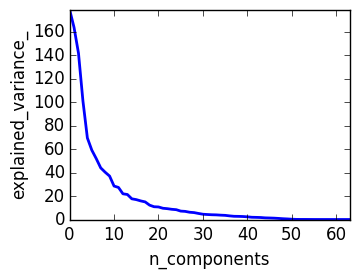

3-element Array{Float64,1}:
     0.0001
     1.0   
 10000.0   

In [2]:
# Original Python Code source: Gaël Varoquaux
# License: BSD 3 clause

logistic = linear_model.LogisticRegression()

pca = decomposition.PCA()
pipe = pipeline.Pipeline([("pca", pca), ("logistic", logistic)])

digits = datasets.load_digits()
X_digits = digits["data"]
y_digits = digits["target"]

###############################################################################
# Plot the PCA spectrum
fit!(pca, X_digits)

figure(1, figsize=(4, 3))
clf()
axes([.2, .2, .7, .7])
plot(pca[:explained_variance_], linewidth=2)
axis("tight")
xlabel("n_components")
ylabel("explained_variance_")

###############################################################################
# Prediction

n_components = [20, 40, 64]
Cs = logspace(-4, 4, 3)

In [23]:
#Parameters of pipelines can be set using ‘__’ separated parameter names:

estimator = GridSearchCV(pipe,
                         Dict("pca__n_components"=>n_components,
                              "logistic__C"=>Cs))
out_py = fit!(estimator, X_digits, y_digits)

#@show estimator.best_estimator_[:named_steps]["pca"][:n_components]
@show estimator[:best_estimator_][:named_steps]["pca"][:n_components]
#axvline(estimator[:best_estimator_][:named_steps]["pca"][:n_components],
#            linestyle=":", label="n_components chosen")
#legend(prop=Dict("size"=>12))

LoadError: LoadError: KeyError: best_estimator_ not found
while loading In[23], in expression starting on line 127

In [24]:
out_py[:, 1] - out_py_old[:, 1]

27-element Array{Any,1}:
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  ⋮         
  0.0       
  0.0       
  0.0       
  0.00166113
 -0.0033389 
  0.0       
 -0.00166113
 -0.0033389 
  0.0       
  0.0       
 -0.00166945
  0.0       

In [4]:
pg = Sklearn.ParameterGrid(Dict("pca__n_components"=>n_components,
                              "logistic__C"=>Cs))

PyObject <sklearn.grid_search.ParameterGrid object at 0x317ff5610>

In [20]:
#Parameters of pipelines can be set using ‘__’ separated parameter names:
jl_estimator = Sklearn.GridSearchCV(pipe,
                         Dict("pca__n_components"=>n_components,
                              "logistic__C"=>Cs))
out_jl = fit!(jl_estimator, X_digits, y_digits)

#@show estimator.best_estimator_[:named_steps]["pca"][:n_components]
@show jl_estimator.best_estimator_[:named_steps]["pca"][:n_components]
#axvline(estimator[:best_estimator_][:named_steps]["pca"][:n_components],
#            linestyle=":", label="n_components chosen")
#legend(prop=Dict("size"=>12))

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:1601: DeprecationWarning: check_cv will return indices instead of boolean masks from 0.17
  'masks from 0.17', DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:69: DeprecationWarning: The indices parameter is deprecated and will be removed (assumed True) in 0.17
  stacklevel=1)


LoadError: LoadError: MethodError: `getindex` has no method matching getindex(::Void, ::Symbol)
while loading In[20], in expression starting on line 127

In [19]:
out_py[:, 1] - out_jl[:, 1]

27-element Array{Any,1}:
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  ⋮         
  0.0       
  0.0       
  0.0       
 -0.00166113
  0.0033389 
  0.00167785
  0.00332226
  0.00166945
  0.0       
  0.0       
  0.00500835
  0.0       

In [21]:
out_py[:, 1] - out_jl[:, 1]

27-element Array{Any,1}:
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  0.0       
  ⋮         
  0.0       
  0.0       
  0.0       
 -0.00166113
  0.0033389 
  0.0       
  0.00498339
  0.0       
  0.0       
 -0.00166113
  0.00166945
  0.00167785

In [6]:
hcat(map(x->x[2], estimator[:grid_scores_]),
     map(x->x.mean_validation_score, jl_estimator.grid_scores_))

LoadError: LoadError: KeyError: grid_scores_ not found
while loading In[6], in expression starting on line 1

In [7]:
jl_estimator.grid_scores_